<a href="https://colab.research.google.com/github/Ankan-238/WildBlueberryYieldProduction/blob/main/Wild_Blueberry_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
!pip install dabl

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model

In [3]:
df = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df.drop('Row#', axis = 1, inplace = True)
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [5]:
df.isnull().sum()
#no null values

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

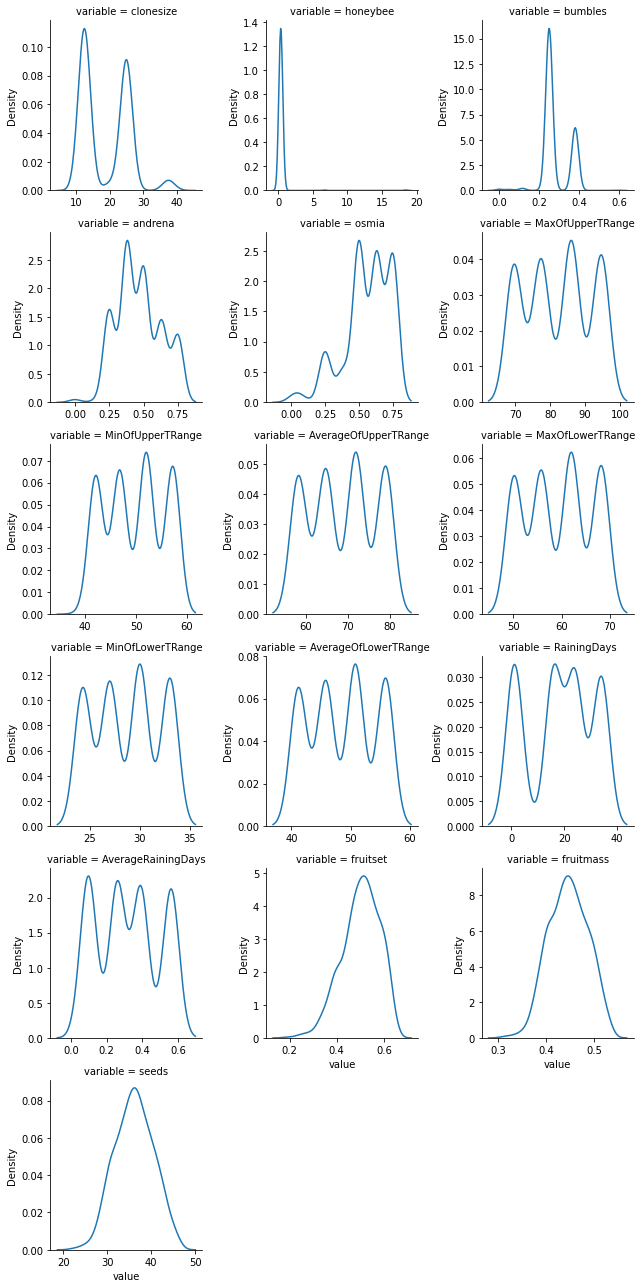

In [6]:
unpivot = pd.melt(df, df.describe().columns[-1], df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


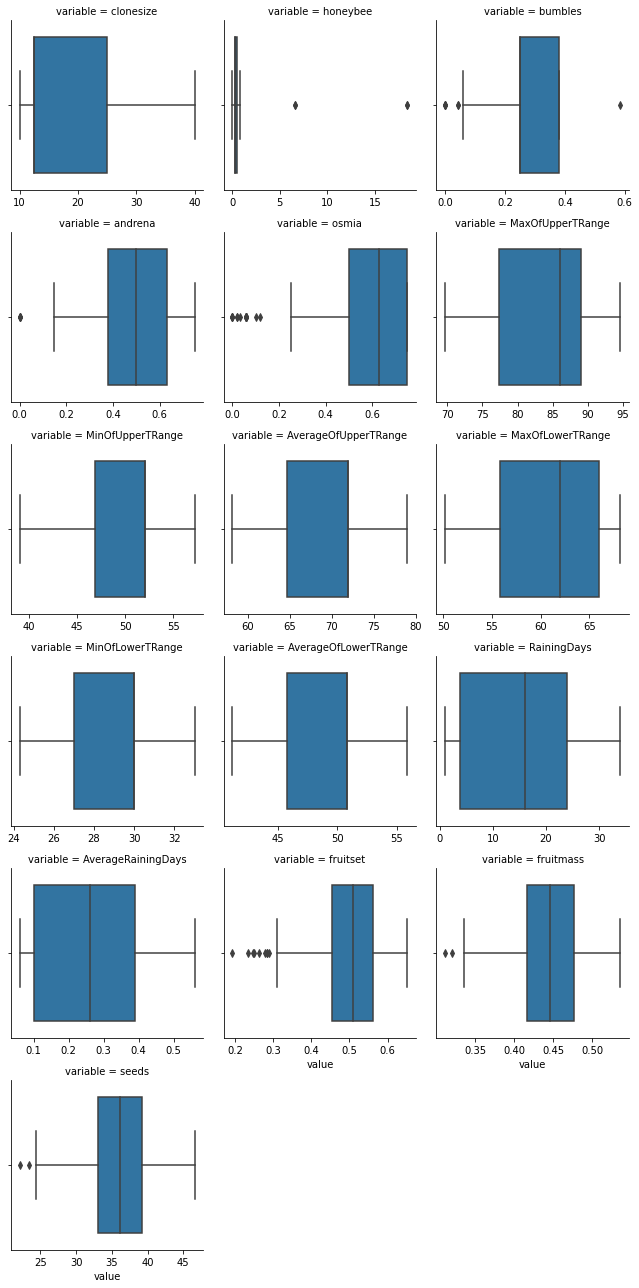

In [7]:
unpivot = pd.melt(df, df.describe().columns[-1], df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

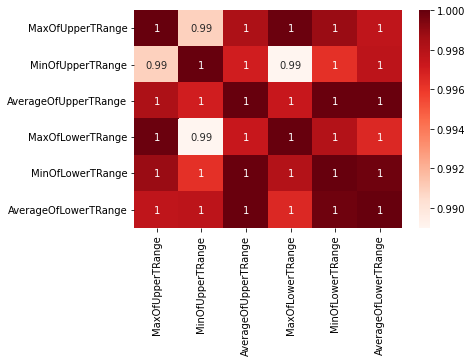

In [8]:
df.corr()
sns.heatmap(df[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange']].corr(), annot= True, cmap= 'Reds')
plt.show()
#highly correlated features

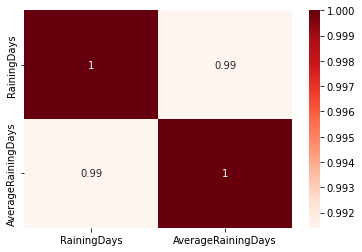

In [9]:
sns.heatmap(df[['RainingDays','AverageRainingDays']].corr(), annot= True, cmap= 'Reds')
plt.show()
#highly correlated features

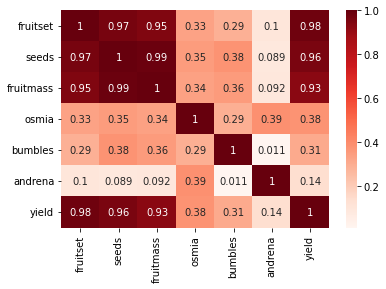

In [10]:
df.corr()
sns.heatmap(df[['fruitset','seeds','fruitmass','osmia','bumbles','andrena','yield']].corr(), annot= True, cmap= 'Reds')
plt.show()
#'fruitset','seeds','fruitmass' are highly correlated and yield is also dependent on these features.

In [11]:
df.drop(columns=['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'], axis=1, inplace=True)
df
#The only required columns

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,0.401538,0.399935,30.582161,4166.299735


In [13]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)
#Z-score is used for detection and removal of outliers

[[2.67812564 0.4885117  1.35954903 ... 0.93841323 1.01564827 1.62208748]
 [2.67812564 0.4885117  1.35954903 ... 0.50923815 0.61097218 0.7855304 ]
 [2.67812564 0.4885117  1.35954903 ... 1.16136881 1.27452236 1.58253738]
 ...
 [0.17618037 2.4945233  0.37165479 ... 1.0994045  1.22836665 1.33459611]
 [0.17618037 2.4945233  0.37165479 ... 1.14243699 1.26632705 1.36167994]
 [0.17618037 2.4945233  0.37165479 ... 1.33180188 1.45822756 1.52624822]]


In [14]:
df_zscore = df[(z < 3).all(axis=1)]
df_zscore.shape

(764, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


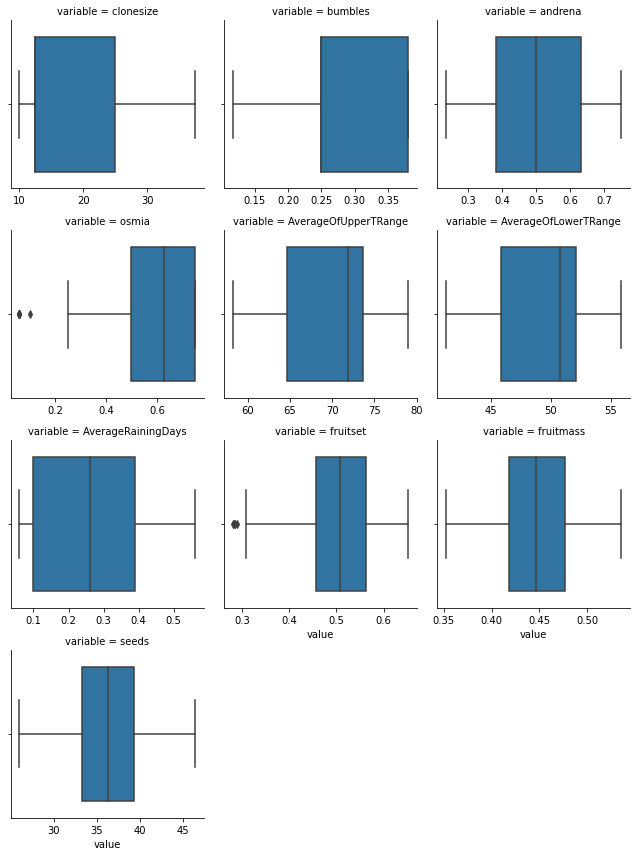

In [15]:
unpivot = pd.melt(df_zscore, df_zscore.describe().columns[-1], df_zscore.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()
#Outliers are removed with the above threshold

In [16]:
df = df_zscore
df

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
770,20.0,0.293,0.234,0.058,71.9,50.8,0.06,0.497503,0.453339,36.633376,5449.421199
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,0.486815,0.428012,33.447471,5333.873335
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,0.401538,0.399935,30.582161,4166.299735


In [17]:
#Feature Selection

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
y= df['yield']
X= df.drop('yield', axis=1)

In [18]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

Feature 0: 175.463722
Feature 1: 35.414625
Feature 2: 8.092982
Feature 3: 95.866044
Feature 4: 23.685723
Feature 5: 23.512387
Feature 6: 265.725911
Feature 7: 18027.130769
Feature 8: 3685.065541
Feature 9: 8199.278441


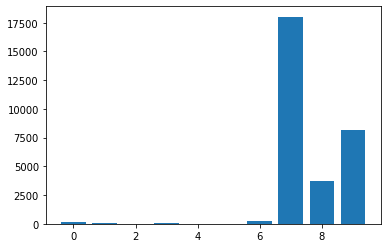

Feature 0: 0.171179
Feature 1: 0.076644
Feature 2: 0.041470
Feature 3: 0.111131
Feature 4: 0.127531
Feature 5: 0.127380
Feature 6: 0.221784
Feature 7: 2.052741
Feature 8: 1.629359
Feature 9: 1.691315


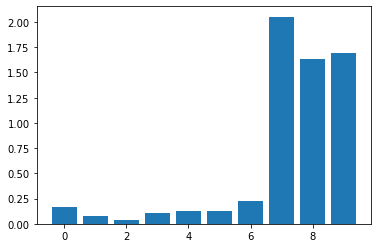

In [20]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

In [21]:
X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=9)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [23]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

In [25]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 103.080
MSE: 19166.573
RMSE: 138.443
R-Square: 0.988


In [26]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [27]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 117.754
MSE: 24716.147
RMSE: 157.214
R-Square: 0.984


In [28]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [29]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 181.066
MSE: 63577.292
RMSE: 252.145
R-Square: 0.960


In [30]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

[19:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 103.536
MSE: 17426.014
RMSE: 252.145
R-Square: 0.989


In [32]:
from sklearn.metrics import r2_score

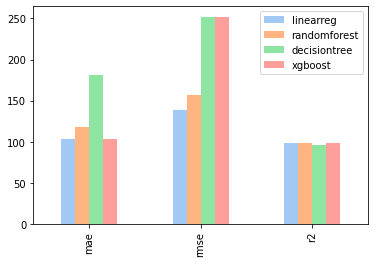

In [33]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [34]:
## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [35]:
#crossvalidation, RepeatedKFold and GridSearchCV are the popular methods for Parameter Tuning
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])


In [36]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]
                     
grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]



LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [38]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

In [39]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'sel__k': 4}
Best MAE: -116.867
Test set mean absolute error for best params: 127.375 
Test set root mean squared error for best params: 11.286 

Estimator: Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -130.971
Test set mean absolute error for best params: 130.399 
Test set root mean squared error for best params: 11.419 

Estimator: XGBoost
[19:57:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Config: {'model__subsample': 1.0, 'sel__k': 4}
Best MAE: -135.114
Test set mean absolute error for best params: 140.048 
Test set root mean squared error for best params: 11.834 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -174.318
Test set mean absolute error for best params: 179.597 
Test set root mean squared error for best params: 13.401 

Classifier with least test set MAE: Linear Regression
Best Model: Linear Regression
Error Rate: 127.37497315779967
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=1),
             estimator=Pipeline(steps=[('sel',
                                   

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [41]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=8)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))
        

Random Forest V-1 optimising...


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -120.512
Test set mean absolute error for best params: 117.162 
Test set root mean squared error for best params: 10.824 


In [42]:
#Model Explainability: fitting the best model with the returned params from GridsearchCV and then passing to SHAP values

fs_rf = SelectKBest(score_func=mutual_info_regression, k=8)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(max_depth = 15, min_samples_split = 2, criterion = 'mse')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [43]:
print(mean_absolute_error(y_test, rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

117.18840893676821
153.58678117510027


In [44]:
feature_columns = [X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['clonesize',
 'osmia',
 'AverageOfUpperTRange',
 'AverageOfLowerTRange',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [48]:
pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

,clonesize,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,79.0,55.9,0.10,0.477832,0.439279,34.878927
1,12.5,0.38,71.9,50.8,0.39,0.500184,0.445340,35.505646
2,25.0,0.75,58.2,41.2,0.56,0.449875,0.413097,33.239806
3,25.0,0.63,64.7,45.8,0.26,0.504761,0.451905,36.415657
4,12.5,0.50,71.9,50.8,0.26,0.615612,0.510575,43.293984
...,...,...,...,...,...,...,...,...
248,25.0,0.25,64.7,45.8,0.10,0.502622,0.454522,36.617049
249,12.5,0.50,64.7,45.8,0.39,0.598814,0.498586,41.730667
250,25.0,0.50,58.2,41.2,0.26,0.494678,0.429703,34.784888
251,12.5,0.50,64.7,45.8,0.26,0.611463,0.504717,42.508522


In [50]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 4.8 MB/s 


In [51]:
X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

shap_values = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
shap_interaction_values = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)

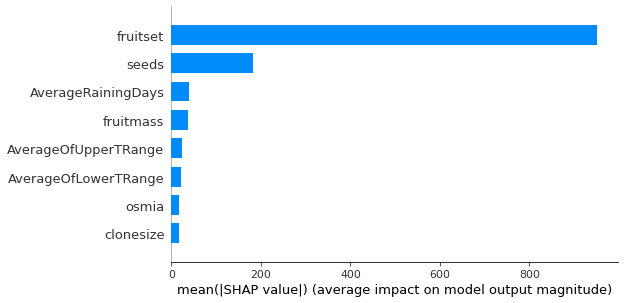

In [52]:
shap.summary_plot(shap_values, X_test_rf_df, plot_type="bar")

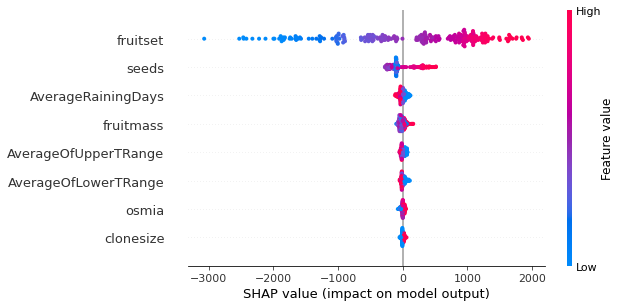

In [53]:
shap.summary_plot(shap_values, X_test_rf_df)

In [54]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[50,0:-3], X_test_rf_df.iloc[50,0:-3])

In [56]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[0:257,:], X_test_rf_df.iloc[0:257,:])

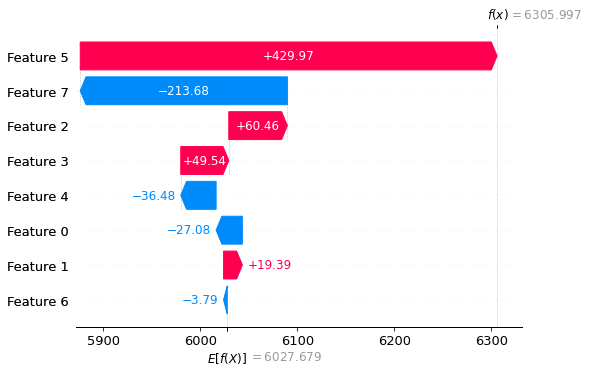

In [57]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_final).expected_value[0], shap_values[row])

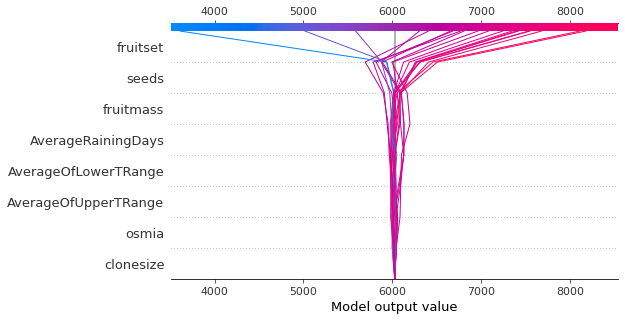

In [58]:
shap.decision_plot(shap.TreeExplainer(rf_final).expected_value[0], shap_values[110:130], feature_columns)

In [59]:
# Save best grid search pipeline to file
dump_file_name = 'lreg_bbry_tuned_model.pkl'
joblib.dump(best_model_v0, dump_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % (best_model_name_v0, dump_file_name))
    
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'rf_bbry_tuned_model.pkl'
joblib.dump(rf_final, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Linear Regression tuned model to directory by name: lreg_bbry_tuned_model.pkl

Saved Random Forest tuned model to directory by name: rf_bbry_tuned_model.pkl


In [60]:
# # Save feature selection objects for backup
joblib.dump(fs_rf, "rf_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("Randomforest fs object", "rf_fs_object.joblib"))


X_test_rf_df.to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

joblib.dump(X_train_rf, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")



 Saved Randomforest fs object to rf_fs_object.joblib

Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [62]:
pd.read_csv("/content/X_test_rf_df.csv", index_col=0).iloc[110].values

array([25.        ,  0.5       , 64.7       , 45.8       ,  0.26      ,
        0.53860419,  0.46876313, 38.3177098 ])

In [63]:
# # Save the target test set
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file


<Figure size 648x936 with 0 Axes>

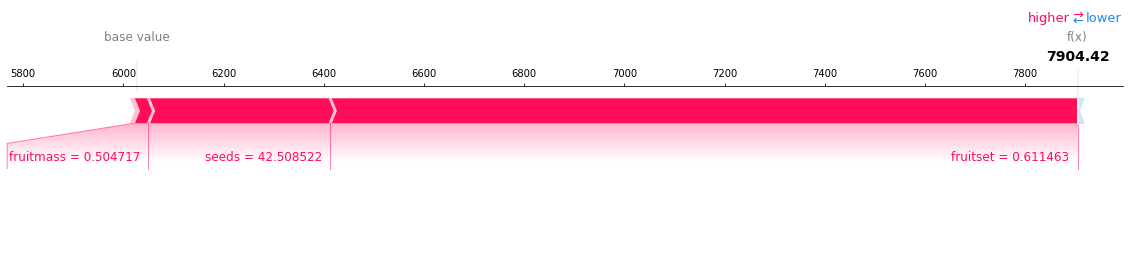

In [64]:
# # Saving png plot image. bbox_inches='tight' will prevent cropping the image

plt.figure(figsize=(9,13))
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, #pass the model
                shap.TreeExplainer(rf_final).shap_values(np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1)), #pass query, will give the prediction
                np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1),
                feature_names=feature_columns,
               show=False,
               matplotlib=True).savefig("test_force_plot1.png", bbox_inches = 'tight') # pass the query in form of dataframe